<a href="https://colab.research.google.com/github/evangrinalds/DS-Unit-4-Sprint-1-NLP/blob/main/module4-topic-modeling/LS_DS18_414_Topic_Modeling_Lecture.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Topic Modeling (Prepare)

On Monday we talked about summarizing your documents using just token counts. Today, we're going to learn about a much more sophisticated approach - learning 'topics' from documents. Topics are a latent structure. They are not directly observable in the data, but we know they're there by reading them.

> **latent**: existing but not yet developed or manifest; hidden or concealed.

## Use Cases
Primary use case: what the hell are your documents about? Who might want to know that in industry - 
* Identifying common themes in customer reviews
* Discovering the needle in a haystack 
* Monitoring communications (Email - State Department) 

## Learning Objectives
*At the end of the lesson you should be able to:*
* Part 0: Warm-Up
* Part 1: Describe how an LDA Model works
* Part 2: Estimate a LDA Model with Gensim
* Part 3: Interpret LDA results & Select the appropriate number of topics

# Part 0: Warm-Up
How do we do a grid search? 

In [ ]:
# Dependencies for the week (instead of conda)
!wget https://raw.githubusercontent.com/LambdaSchool/DS-Unit-4-Sprint-1-NLP/main/requirements.txt
!pip install -r requirements.txt

--2020-10-01 16:19:39--  https://raw.githubusercontent.com/LambdaSchool/DS-Unit-4-Sprint-1-NLP/main/requirements.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 137 [text/plain]
Saving to: ‘requirements.txt’

requirements.txt    100%[===================>]     137  --.-KB/s    in 0s      

2020-10-01 16:19:39 (6.24 MB/s) - ‘requirements.txt’ saved [137/137]

     |████████████████████████████████| 24.2MB 1.8MB/s 
     |████████████████████████████████| 1.6MB 47.2MB/s 
     |████████████████████████████████| 10.4MB 42.2MB/s 
     |████████████████████████████████| 7.1MB 23.1MB/s 
     |████████████████████████████████| 215kB 48.4MB/s 
     |████████████████████████████████| 2.2MB 50.0MB/s 
  Created wheel for pyLDAvis: filename=pyLDAvis-2.1.2-py2.py3-none-any.w

In [ ]:
!python -m spacy download en_core_web_lg  # Can do lg, takes awhile
# Also on Colab, need to restart runtime after this step!

     |████████████████████████████████| 827.9MB 1.2MB/s 
  Created wheel for en-core-web-lg: filename=en_core_web_lg-2.2.5-cp36-none-any.whl size=829180944 sha256=7b0804845a358c074d5fcc43b5e9c4e220f7670c9bc5c7dbfe7761695e3a61a8
  Stored in directory: /tmp/pip-ephem-wheel-cache-nf5ow82r/wheels/2a/c1/a6/fc7a877b1efca9bc6a089d6f506f16d3868408f9ff89f8dbfc
Successfully built en-core-web-lg
✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_lg')


In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
import pandas as pd
from sklearn.datasets import fetch_20newsgroups
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
data = fetch_20newsgroups()

In [ ]:
data.keys()

dict_keys(['data', 'filenames', 'target_names', 'target', 'DESCR'])

In [ ]:
data['target_names']

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

In [ ]:
data['data'][1000]

"From: dabl2@nlm.nih.gov (Don A.B. Lindbergh)\nSubject: Diamond SS24X, Win 3.1, Mouse cursor\nOrganization: National Library of Medicine\nLines: 10\n\n\nAnybody seen mouse cursor distortion running the Diamond 1024x768x256 driver?\nSorry, don't know the version of the driver (no indication in the menus) but it's a recently\ndelivered Gateway system.  Am going to try the latest drivers from Diamond BBS but wondered\nif anyone else had seen this.\n\npost or email\n\n--Don Lindbergh\ndabl2@lhc.nlm.nih.gov\n"

### GridSearch on Just Classifier
* Fit the vectorizer and prepare BEFORE it goes into the gridsearch

In [ ]:
v1 = TfidfVectorizer()
X_train = v1.fit_transform(data['data'])

In [ ]:
p1 = {
    'n_estimators':[10, 20],
    'max_depth': [None, 7]
}

In [ ]:
clf = RandomForestClassifier()
gs1 = GridSearchCV(clf, p1, cv=3, n_jobs=-1, verbose=1)
gs1.fit(X_train, data['target'])

Fitting 3 folds for each of 4 candidates, totalling 12 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  12 out of  12 | elapsed:   36.1s finished


GridSearchCV(cv=3, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rando

In [ ]:
gs1.predict(["Sample text"])

ValueError: ignored

In [ ]:
test_sample = v1.transform(["Sample text"])
test_sample.shape

(1, 130107)

In [ ]:
pred = gs1.predict(test_sample)
pred

array([6])

In [ ]:
data['target_names'][pred[0]]

'misc.forsale'

### GridSearch with BOTH the Vectoizer & Classifier

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import GridSearchCV

# 1. Create a pipeline with a vectorizer and a classifier
v2 = TfidfVectorizer()
clf = RandomForestClassifier()

pipe = Pipeline(
    [('vect', v2),
     ('clf', clf)]
)

p2 = {
    'vect__max_features': [1000, 5000],
    'clf__n_estimators': [10, 20],
    'clf__max_depth': [None, 7]
}

# 2. Use Grid Search to optimize the entire pipeline
gs2 = GridSearchCV(pipe, p2, cv=3, n_jobs=-1, verbose=1)
gs2.fit(data['data'], data['target'])

Fitting 3 folds for each of 8 candidates, totalling 24 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 out of  24 | elapsed:  1.5min finished


GridSearchCV(cv=3, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('vect',
                                        TfidfVectorizer(analyzer='word',
                                                        binary=False,
                                                        decode_error='strict',
                                                        dtype=<class 'numpy.float64'>,
                                                        encoding='utf-8',
                                                        input='content',
                                                        lowercase=True,
                                                        max_df=1.0,
                                                        max_features=None,
                                                        min_df=1,
                                                        ngram_range=(1, 1),
                                                        no

In [ ]:
pred = gs2.predict(["Sample text"])

In [ ]:
data['target_names'][pred[0]]

'comp.os.ms-windows.misc'

Advantages to using GS with the Pipe:
* Allows us to make predictions on raw text increasing reproducibility. :)
* Allows us to tune the parameters of the vectorizer along side the classifier. :D 

# Part 1: Describe how an LDA Model works

[Your Guide to Latent Dirichlet Allocation](https://medium.com/@lettier/how-does-lda-work-ill-explain-using-emoji-108abf40fa7d)

[LDA Topic Modeling](https://lettier.com/projects/lda-topic-modeling/)

[Topic Modeling with Gensim](https://www.machinelearningplus.com/nlp/topic-modeling-gensim-python/)

In [ ]:
# Download spacy model
#import spacy.cli
#spacy.cli.download("en_core_web_lg")

In [ ]:
import re
import numpy as np
import pandas as pd
from pprint import pprint

import gensim  # the LDA/topic modeling library
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel

import spacy

import pyLDAvis
import pyLDAvis.gensim 
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
df = pd.DataFrame({
    'content': data['data'],
    'target': data['target'],
    'target_names': [data['target_names'][i] for i in data['target']]
})
df

,content,target,target_names
0,From: lerxst@wam.umd.edu (where's my thing)\nS...,7,rec.autos
1,From: guykuo@carson.u.washington.edu (Guy Kuo)...,4,comp.sys.mac.hardware
2,From: twillis@ec.ecn.purdue.edu (Thomas E Will...,4,comp.sys.mac.hardware
3,From: jgreen@amber (Joe Green)\nSubject: Re: W...,1,comp.graphics
4,From: jcm@head-cfa.harvard.edu (Jonathan McDow...,14,sci.space
...,...,...,...
11309,From: jim.zisfein@factory.com (Jim Zisfein) \n...,13,sci.med
11310,From: ebodin@pearl.tufts.edu\nSubject: Screen ...,4,comp.sys.mac.hardware
11311,From: westes@netcom.com (Will Estes)\nSubject:...,3,comp.sys.ibm.pc.hardware
11312,From: steve@hcrlgw (Steven Collins)\nSubject: ...,1,comp.graphics


In [ ]:
# For reference on regex: https://docs.python.org/3/library/re.html

# From 'content' column: 
# 1. Remove leading/trailing whitespace 
df['content'] = df['content'].apply(lambda c: c.strip())

# 2. Remove Emails
df['content'] = df['content'].apply(lambda c: re.sub('From: \S+@\S+', '', c))

# 3. Remove excessive (>1) whitespace characters
df['content'] = df['content'].apply(lambda c: re.sub('\s+', ' ', c))

# 4. Remove non-alphanumeric characters
df['content'] = df['content'].apply(lambda c: re.sub('[^0-9 a-zA-Z]+', '', c))

<input>:8: DeprecationWarning: invalid escape sequence \S
<input>:8: DeprecationWarning: invalid escape sequence \S
<input>:8: DeprecationWarning: invalid escape sequence \S
<input>:8: DeprecationWarning: invalid escape sequence \S
<input>:8: DeprecationWarning: invalid escape sequence \S
<input>:8: DeprecationWarning: invalid escape sequence \S
<input>:8: DeprecationWarning: invalid escape sequence \S
<input>:8: DeprecationWarning: invalid escape sequence \S
<input>:8: DeprecationWarning: invalid escape sequence \S
<input>:8: DeprecationWarning: invalid escape sequence \S
<input>:11: DeprecationWarning: invalid escape sequence \s
<input>:8: DeprecationWarning: invalid escape sequence \S
<input>:11: DeprecationWarning: invalid escape sequence \s
<input>:8: DeprecationWarning: invalid escape sequence \S
<input>:11: DeprecationWarning: invalid escape sequence \s
<input>:8: DeprecationWarning: invalid escape sequence \S
<input>:11: DeprecationWarning: invalid escape sequence \s
<input>:8:

In [ ]:
df.head()

,content,target,target_names
0,wheres my thing Subject WHAT car is this Nntp...,7,rec.autos
1,Guy Kuo Subject SI Clock Poll Final Call Sum...,4,comp.sys.mac.hardware
2,Thomas E Willis Subject PB questions Organiza...,4,comp.sys.mac.hardware
3,Joe Green Subject Re Weitek P9000 Organizati...,1,comp.graphics
4,Jonathan McDowell Subject Re Shuttle Launch Q...,14,sci.space


In [ ]:
!pip install pandarallel

  Created wheel for pandarallel: filename=pandarallel-1.5.1-cp36-none-any.whl size=17126 sha256=5ad404c50635c88516c6a184c06b48499d50bf982334629a54e771588026beae
  Stored in directory: /root/.cache/pip/wheels/6f/c8/e5/d43fa63105ce1dd22f4df51bc2edfefd54d92ce64f25326314
Successfully built pandarallel


In [ ]:
from pandarallel import pandarallel
pandarallel.initialize(progress_bar=True)

INFO: Pandarallel will run on 2 workers.
INFO: Pandarallel will use Memory file system to transfer data between the main process and workers.


In [ ]:
nlp = spacy.load("en_core_web_lg")

In [ ]:
# Equivalent to the below lambda w/list comprehension
def lemma_tokenizer(text):
  lemmas = []
  for token in nlp(text):
    if token.is_stop != True and token.is_punct != True:
      lemmas.append(token.lemma_)
  return lemmas

In [ ]:
# Create 'lemmas' column
%%time

df['lemmas'] = df['content'].parallel_apply(
    lambda c: [token.lemma_ for token in nlp(c) if (token.is_stop != True) and
               (token.is_punct != True)])

# can add (token.text is not ' ') to get rid of spaces

   0.00%                                          |        0 /     5657 |      
   0.00%                                          |        0 /     5657 |      M   0.99%                                          |       56 /     5657 |      
   0.00%                                          |        0 /     5657 |      M   1.03%                                          |       58 /     5657 |      
   0.99%                                          |       56 /     5657 |      M   1.03%                                          |       58 /     5657 |      
   1.06%                                          |       60 /     5657 |      M   1.08%                                

In [ ]:
df.head()

,content,target,target_names,lemmas
0,wheres my thing Subject WHAT car is this Nntp...,7,rec.autos,"[ , s, thing, subject, car, NntpPostingHost, r..."
1,Guy Kuo Subject SI Clock Poll Final Call Sum...,4,comp.sys.mac.hardware,"[ , Guy, Kuo, Subject, SI, Clock, Poll, , Fin..."
2,Thomas E Willis Subject PB questions Organiza...,4,comp.sys.mac.hardware,"[ , Thomas, E, Willis, Subject, PB, question, ..."
3,Joe Green Subject Re Weitek P9000 Organizati...,1,comp.graphics,"[ , Joe, Green, Subject, Weitek, P9000, , Org..."
4,Jonathan McDowell Subject Re Shuttle Launch Q...,14,sci.space,"[ , Jonathan, McDowell, Subject, Shuttle, Laun..."


### The two main inputs to the LDA topic model are the dictionary (id2word) and the corpus.

In [ ]:
# Create Dictionary
id2word = corpora.Dictionary(df['lemmas'] )

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in df['lemmas']]

In [ ]:
id2word[200]

'prove'

In [ ]:
df['content'][5]

' Foxvog Douglas Subject Re Rewording the Second Amendment ideas Organization VTT Lines 58 In article 1r1eu14ttransferstratuscom cdtswstratuscom C D Tavares writes In article 1993Apr2008305716899ousrvroulufi dfovttoulutkovttfi Foxvog Douglas writes  In article 1qv87v4j3transferstratuscom cdtswstratuscom C D Tavares writes  In article C5n3GIF8Fulowellulowelledu jrutledgcsulowelledu John Lawrence Rutledge writes    The massive destructive power of many modern weapons makes the   cost of an accidental or crimial usage of these weapons to great   The weapons of mass destruction need to be in the control of   the government only Individual access would result in the   needless deaths of millions This makes the right of the people   to keep and bear many modern weapons nonexistant  Thanks for stating where youre coming from Needless to say I  disagree on every count  You believe that individuals should have the right to own weapons of  mass destruction I find it hard to believe that you woul

In [ ]:
corpus[5]

[(0, 15),
 (9, 1),
 (12, 1),
 (46, 1),
 (49, 1),
 (64, 1),
 (91, 1),
 (92, 1),
 (108, 1),
 (109, 1),
 (132, 1),
 (162, 1),
 (165, 1),
 (190, 2),
 (225, 1),
 (233, 5),
 (255, 5),
 (269, 1),
 (279, 5),
 (302, 1),
 (321, 1),
 (322, 3),
 (333, 1),
 (341, 1),
 (342, 1),
 (343, 1),
 (344, 1),
 (345, 1),
 (346, 1),
 (347, 1),
 (348, 1),
 (349, 2),
 (350, 1),
 (351, 2),
 (352, 3),
 (353, 1),
 (354, 1),
 (355, 2),
 (356, 2),
 (357, 1),
 (358, 1),
 (359, 3),
 (360, 1),
 (361, 1),
 (362, 1),
 (363, 1),
 (364, 1),
 (365, 2),
 (366, 1),
 (367, 1),
 (368, 1),
 (369, 1),
 (370, 1),
 (371, 1),
 (372, 1),
 (373, 1),
 (374, 3),
 (375, 1),
 (376, 1),
 (377, 1),
 (378, 2),
 (379, 1),
 (380, 2),
 (381, 1),
 (382, 1),
 (383, 1),
 (384, 1),
 (385, 1),
 (386, 1),
 (387, 1),
 (388, 1),
 (389, 1),
 (390, 1),
 (391, 1),
 (392, 1),
 (393, 1),
 (394, 7),
 (395, 1),
 (396, 1),
 (397, 1),
 (398, 1),
 (399, 1),
 (400, 1),
 (401, 1),
 (402, 1),
 (403, 1),
 (404, 1),
 (405, 1),
 (406, 1),
 (407, 1),
 (408, 1),
 (409, 1

In [ ]:
id2word[255]

'article'

In [ ]:
id2word[252]

'abraxisiastateedu'

In [ ]:
id2word[276]

'stuff'

In [ ]:
# Human readable format of corpus (term-frequency)
[(id2word[word_id], word_count) for word_id, word_count in corpus[5]]

[(' ', 15),
 ('Lines', 1),
 ('Organization', 1),
 ('thank', 1),
 ('year', 1),
 ('Subject', 1),
 ('not', 1),
 ('number', 1),
 ('usage', 1),
 ('   ', 1),
 ('access', 1),
 ('give', 1),
 ('great', 1),
 ('people', 2),
 ('use', 1),
 ('  ', 5),
 ('article', 5),
 ('point', 1),
 ('write', 5),
 ('check', 1),
 ('quote', 1),
 ('right', 3),
 ('understanding', 1),
 ('1993apr2008305716899ousrvroulufi', 1),
 ('1qv87v4j3transferstratuscom', 1),
 ('1r1eu14ttransferstratuscom', 1),
 ('58', 1),
 ('Amendment', 1),
 ('Brady', 1),
 ('C5n3GIF8Fulowellulowelledu', 1),
 ('CBW', 1),
 ('D', 2),
 ('Doug', 1),
 ('Douglas', 2),
 ('Foxvog', 3),
 ('Individual', 1),
 ('Investors', 1),
 ('John', 2),
 ('Lawrence', 2),
 ('Needless', 1),
 ('Packet', 1),
 ('Rutledge', 3),
 ('SKS', 1),
 ('Sarah', 1),
 ('Second', 1),
 ('Street', 1),
 ('Sweeper', 1),
 ('Tavares', 2),
 ('VTT', 1),
 ('accidental', 1),
 ('agree', 1),
 ('allegedly', 1),
 ('allow', 1),
 ('analysis', 1),
 ('argument', 1),
 ('bear', 1),
 ('believe', 3),
 ('bill', 1),

# Part 2: Estimate a LDA Model with Gensim


 ### Train an LDA model

In [ ]:
'''
%%time
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=20, 
                                           chunksize=100,
                                           passes=10,
                                           per_word_topics=True)
'''
# https://radimrehurek.com/gensim/models/ldamodel.html

In [ ]:
# lda_model.save('lda_model.model')

In [ ]:
%%time
lda_multicore = gensim.models.ldamulticore.LdaMulticore(corpus=corpus,
                                                        id2word=id2word,
                                                        num_topics=15, 
                                                        chunksize=100,
                                                        passes=2,
                                                        per_word_topics=True,
                                                        workers=12)

# https://radimrehurek.com/gensim/models/ldamulticore.html

CPU times: user 53.1 s, sys: 4.46 s, total: 57.6 s
Wall time: 1min 19s


In [ ]:
lda_multicore.save('lda_multicore.model')

In [ ]:
from gensim import models
lda_multicore =  models.LdaModel.load('lda_multicore.model')

### View the topics in LDA model

In [ ]:
pprint(lda_multicore.print_topics())
doc_lda = lda_multicore[corpus]

[(0,
  '0.013*" " + 0.006*"not" + 0.004*"write" + 0.004*"Subject" + '
  '0.004*"Organization" + 0.004*"GM" + 0.004*"University" + 0.003*"  " + '
  '0.003*"good" + 0.003*"Lines"'),
 (1,
  '0.040*" " + 0.008*"  " + 0.008*"not" + 0.006*"people" + 0.005*"Subject" + '
  '0.005*"write" + 0.005*"article" + 0.005*"Organization" + 0.005*"know" + '
  '0.004*"time"'),
 (2,
  '0.013*" " + 0.006*"armenian" + 0.005*"Armenians" + 0.005*"turkish" + '
  '0.004*"Argic" + 0.004*"Serdar" + 0.004*"child" + 0.004*"report" + '
  '0.003*"April" + 0.003*"Turks"'),
 (3,
  '0.035*" " + 0.025*"1" + 0.019*"0" + 0.014*"2" + 0.009*"3" + 0.007*"4" + '
  '0.006*"not" + 0.006*"5" + 0.005*"6" + 0.005*"  "'),
 (4,
  '0.009*" " + 0.008*"not" + 0.005*"car" + 0.003*"Subject" + '
  '0.003*"Organization" + 0.003*"yeast" + 0.003*"drive" + 0.002*"Lines" + '
  '0.002*"be" + 0.002*"University"'),
 (5,
  '0.022*" " + 0.021*"drive" + 0.008*"not" + 0.008*"SCSI" + 0.006*"DB" + '
  '0.006*"IDE" + 0.005*"know" + 0.005*"controller" + 0.

### What is topic Perplexity?
Perplexity is a statistical measure of how well a probability model predicts a sample. As applied to LDA, for a given value of , you estimate the LDA model. Then given the theoretical word distributions represented by the topics, compare that to the actual topic mixtures, or distribution of words in your documents.

### What is topic coherence?
Topic Coherence measures score a single topic by measuring the degree of semantic similarity between high scoring words in the topic. These measurements help distinguish between topics that are semantically interpretable topics and topics that are artifacts of statistical inference.
A set of statements or facts is said to be coherent, if they support each other. Thus, a coherent fact set can be interpreted in a context that covers all or most of the facts. An example of a coherent fact set is “the game is a team sport”, “the game is played with a ball”, “the game demands great physical efforts”

In [ ]:
# Compute Perplexity
print('\nPerplexity: ', lda_multicore.log_perplexity(corpus))
# a measure of how good the model is. lower the better.

# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_multicore, 
                                     texts=df['lemmas'], 
                                     dictionary=id2word, 
                                     coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Perplexity:  -10.42185000693505

Coherence Score:  0.45733760304272947


# Part 3: Interpret LDA results & Select the appropriate number of topics

In [ ]:
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_multicore, corpus, id2word)
pyLDAvis.display(vis)

In [ ]:
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = gensim.models.ldamulticore.LdaMulticore(corpus=corpus,
                                                        id2word=id2word,
                                                        num_topics=num_topics, 
                                                        chunksize=100,
                                                        passes=10,
                                                        per_word_topics=True,
                                                        workers=12)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

In [ ]:
# %%time
# model_list, coherence_values = compute_coherence_values(dictionary=id2word, corpus=corpus, texts=df['lemmas'], start=2, limit=40, step=6)

In [ ]:
# Precalculated results from above
coherence_values = [0.5054, 0.5332, 0.5452, 0.564, 0.5678, 0.5518, 0.519]

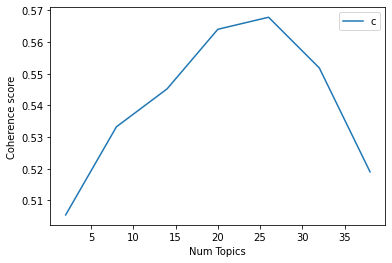

In [ ]:
limit=40; start=2; step=6;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [ ]:
# Print the coherence scores
for m, cv in zip(x, coherence_values):
    print("Num Topics =", m, " has Coherence Value of", round(cv, 4))

Num Topics = 2  has Coherence Value of 0.5054
Num Topics = 8  has Coherence Value of 0.5332
Num Topics = 14  has Coherence Value of 0.5452
Num Topics = 20  has Coherence Value of 0.564
Num Topics = 26  has Coherence Value of 0.5678
Num Topics = 32  has Coherence Value of 0.5518
Num Topics = 38  has Coherence Value of 0.519


In [ ]:
# Select the model and print the topics
# Not used, but left in as example of loading a model and reporting topics
#optimal_model = model_list[4]
optimal_model =  models.LdaModel.load('optimal_model.model')
model_topics = optimal_model.show_topics(formatted=False)
pprint(optimal_model.print_topics(num_words=10))